In [ ]:
import zipfile

# Unzip the dataset
zip_ref = zipfile.ZipFile("/content/Trail.zip", 'r')
zip_ref.extractall("/content/Dataset")
zip_ref.close()

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train = tf.keras.utils.image_dataset_from_directory(
    "/content/Dataset/Trail/Train",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)

valid = tf.keras.utils.image_dataset_from_directory(
    "/content/Dataset/Trail/Test",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)

# Print class names
classes = train.class_names
print(f"Classes: {classes}")


Found 38 files belonging to 2 classes.
Found 4 files belonging to 2 classes.
Classes: ['Noris', 'Osstem']


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Resize and Rescale Layer
resize_and_rescale = Sequential([
    layers.Resizing(256, 256),  # Resize all images to 256x256
    layers.Rescaling(1./255, input_shape=(256, 256, 3))  # Normalize pixel values to [0, 1]
])

# Data Augmentation Layer
data_augment = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Randomly flip images horizontally and vertically
    layers.RandomRotation(0.2)  # Randomly rotate images by up to 20%
])

print("Preprocessing layers are set up successfully!")


Preprocessing layers are set up successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = Sequential([
    layers.Input(shape=(256, 256, 3)),  # Input layer
    resize_and_rescale,                 # Resize and rescale
    data_augment,                       # Data augmentation
    layers.Conv2D(32, (3, 3), activation="relu"),  # Convolutional layer
    layers.MaxPooling2D((2, 2)),        # Max pooling layer
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),                   # Flatten feature maps
    layers.Dense(64, activation="relu"),  # Fully connected layer
    layers.Dense(len(classes), activation="softmax")  # Output layer with softmax activation
])

# Print the model summary
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,826 (1.06 MB)

 Trainable params: 277,826 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',  # Adaptive moment estimation optimizer
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Loss for multiclass classification
    metrics=['accuracy']  # Evaluate accuracy during training
)

print("Model compiled successfully!")

Model compiled successfully!


In [ ]:
history = model.fit(
    train,
    epochs=50,  # Number of training epochs
    batch_size=32,  # Batch size for training
    validation_data=valid,  # Use validation dataset for validation metrics
    verbose=1  # Display progress during training
)

print("Model training completed!")

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 822ms/step - accuracy: 0.5455 - loss: 0.6865 - val_accuracy: 0.5000 - val_loss: 0.6956
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 824ms/step - accuracy: 0.5559 - loss: 0.6873 - val_accuracy: 0.5000 - val_loss: 0.6984
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 782ms/step - accuracy: 0.5455 - loss: 0.6858 - val_accuracy: 0.5000 - val_loss: 0.6985
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5455 - loss: 0.6811 - val_accuracy: 0.5000 - val_loss: 0.7329
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 845ms/step - accuracy: 0.5663 - loss: 0.6868 - val_accuracy: 0.5000 - val_loss: 0.6976
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 819ms/step - accuracy: 0.5663 - loss: 0.6698 - val_accuracy: 1.0000 - val_loss: 0.6820
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 832ms/step - accuracy: 0.6223 - loss: 0.6880 - val_accuracy: 0.5000 - val_loss: 0.6848
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5247 - loss: 0.6901 - val_accuracy: 0.7500 - val_loss: 0.686

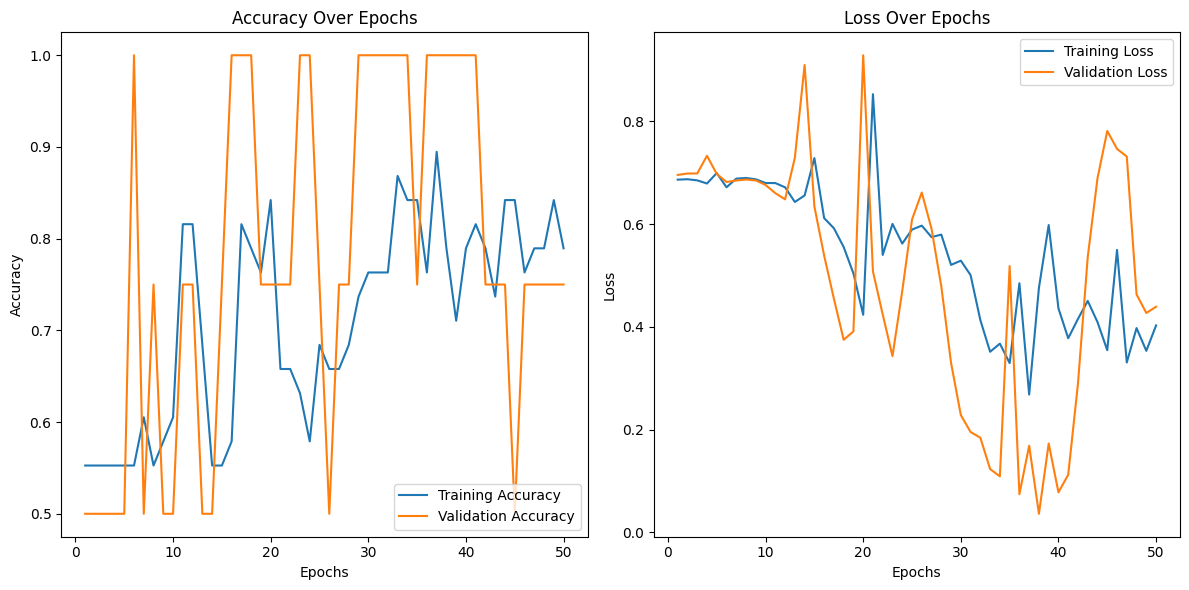

In [ ]:
# Extract accuracy and loss
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


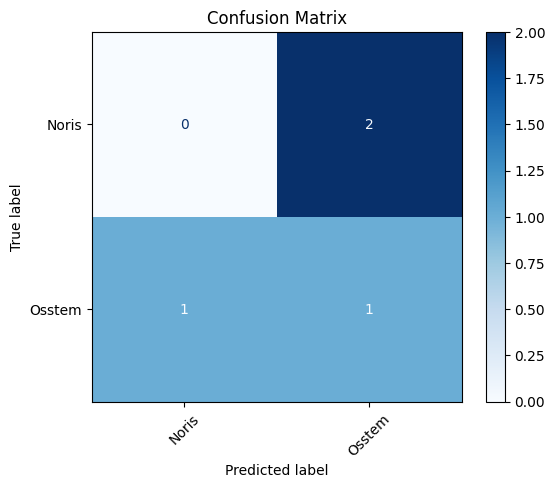

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict on the validation dataset
y_true = np.concatenate([y for x, y in valid], axis=0)
y_pred = np.argmax(model.predict(valid), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(len(classes)))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


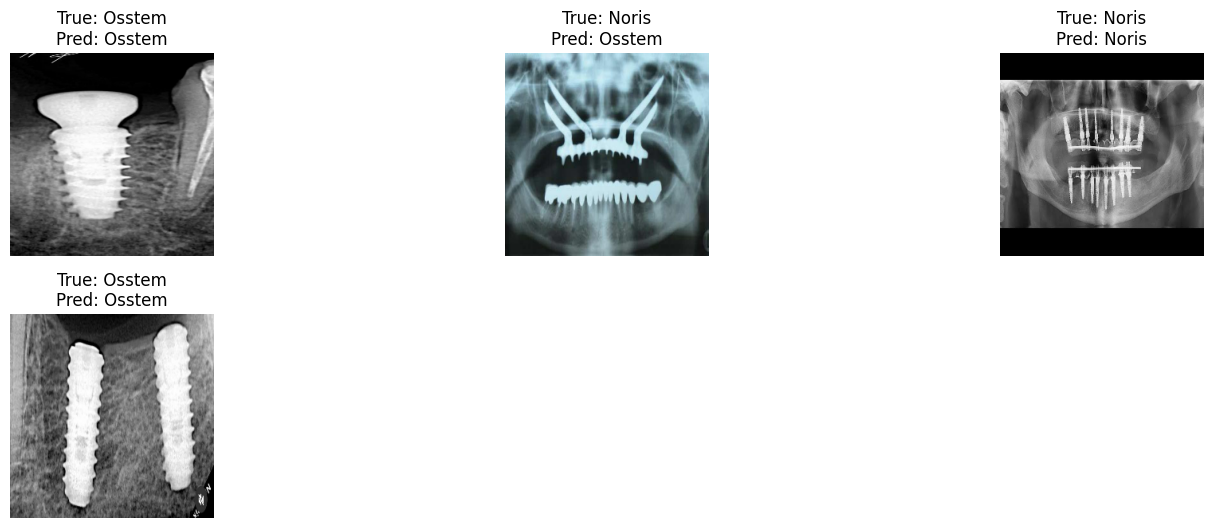

In [ ]:
# Get a batch of test images and labels
for images, labels in valid.take(1):
    images = images.numpy()  # Convert to numpy
    labels = labels.numpy()  # Convert labels to numpy

    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Determine the number of images in the current batch
    num_images = len(images)

    # Plot the images in the current batch
    plt.figure(figsize=(15, 8))
    for i in range(num_images):  # Only iterate through available images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].astype("uint8"))  # Convert image to uint8 for display
        plt.title(f"True: {classes[labels[i]]}\nPred: {classes[predicted_classes[i]]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    break


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(valid, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.7500 - loss: 0.4392
Test Accuracy: 0.75
Test Loss: 0.44


Loaded image: /content/Dataset/Trail/Test/osstem/WhatsApp Image 2025-01-02 at 15.48.26_5ba90e12.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


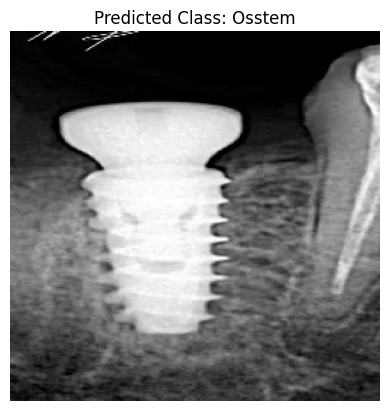

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

def preprocess_image(image_path):
    """
    Preprocess an image for prediction.
    """
    try:
        img = image.load_img(image_path, target_size=(256, 256))  # Resize image
        print(f"Loaded image: {image_path}")
        img_array = image.img_to_array(img)  # Convert to array
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array /= 255.0  # Normalize to [0, 1]
        return img_array
    except Exception as e:
        print("noris")  # Print "noris" if there's an issue
        return None

# Path to the image
image_path = "/content/Dataset/Trail/Test/osstem/WhatsApp Image 2025-01-02 at 15.48.26_5ba90e12.jpg"
if not os.path.exists(image_path):
    print("noris")  # If the image does not exist, print "noris"
else:
    img_array = preprocess_image(image_path)

    if img_array is not None:
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        predicted_class = classes[predicted_class_index]

        # Display image and prediction
        plt.imshow(image.load_img(image_path, target_size=(256, 256)))
        plt.title(f"Predicted Class: {predicted_class}")
        plt.axis("off")
        plt.show()
    else:
        print("noris")  # If preprocessing fails, print "noris"


In [ ]:
print(f"Model input shape: {model.input_shape}")

Model input shape: (None, 256, 256, 3)


In [ ]:
prediction = model.predict(img_array)
print(f"Prediction probabilities: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction probabilities: [[0.09577142 0.90422857]]
